# GameStop Corp. (Data Collection)

---
##### Assignment: **Case Study Part 2: Data Collection and Briefing Report**
##### Course Title: **DAMO-511-7: Winter 2025 Data Analytics Case Study 2**
##### Professor Name: **Professor Touraj Banirostam**
##### Submission Date: **March 12, 2025**
##### Submitted By:
1. **Dev D. Rabadia (NF1005560)**
2. **Mark C. Guanizo (NF1003833)**
3. **Miko L. Tan (NF1008647)**

Collect relevant data for your selected aspects of the PESTEL framework pertinent to the chosen operational focus. Students will identify data sources and collect data related to political, economic, social, technological, environmental, and legal factors that could impact the operational aspect under study. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Load the Dataset

In [2]:
file_path = "Datasets/GameStop_Project Raw Data.xlsx"

In [3]:
# Load the workbook and get sheet names
xls = pd.ExcelFile(file_path)
print(xls.sheet_names)  # List all sheet names

['References', 'Company', 'Sales_GameStop', 'Sales_Walmart', 'Sales_Amazon', 'Sales_BestBuy', 'Sales_Miniso', 'Sales_Funko', 'Sales_Gaming Consoles', 'Stock Price_GameStop', 'Gaming Console', 'Category Sales', 'Dept Sales', 'Top Games', 'NFT Sales', 'Card Grading Sales']


### Build the Sales Table (Fact Table)

In [4]:
# Build the Sales table
sales_df = pd.DataFrame({
    "Company ID": pd.Series(dtype='str'),
    "Fiscal Year": pd.Series(dtype='int'),
    "Fiscal Quarter": pd.Series(dtype='str'),
    "Fiscal Month End": pd.Series(dtype='str'),
    "Total Sales (USD)": pd.Series(dtype='float64'),
    "Total Units Sold": pd.Series(dtype='int')
})

# Load the data to the Sales table
sales_df = pd.concat([
    pd.read_excel(xls, sheet_name="Sales_GameStop"),  # Load all columns
    pd.read_excel(xls, sheet_name="Sales_Walmart"),  # Load all columns
    pd.read_excel(xls, sheet_name="Sales_Amazon"),  # Load all columns
    pd.read_excel(xls, sheet_name="Sales_BestBuy"),  # Load all columns
    pd.read_excel(xls, sheet_name="Sales_Miniso", 
        usecols=["Company ID", "Fiscal Year", "Fiscal Quarter", "Fiscal Month End", "Total Sales (USD)"]),  # Load only columns A to E
    pd.read_excel(xls, sheet_name="Sales_Funko"),  # Load all columns
    pd.read_excel(xls, sheet_name="Sales_Gaming Consoles", usecols=["Company ID", 
        "Fiscal Year", "Fiscal Quarter", "Fiscal Month End", "Total Sales (USD)", "Total Units Sold"])  # Load extended columns   
], ignore_index=True)
sales_df.info()
sales_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company ID         176 non-null    object 
 1   Fiscal Year        176 non-null    int64  
 2   Fiscal Quarter     176 non-null    object 
 3   Fiscal Month End   176 non-null    object 
 4   Total Sales (USD)  176 non-null    int64  
 5   Total Units Sold   60 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 8.4+ KB


,Company ID,Fiscal Year,Fiscal Quarter,Fiscal Month End,Total Sales (USD),Total Units Sold
0,GME,2020,Q1,March,1021000000,NaN
1,GME,2020,Q2,June,942000000,NaN
2,GME,2020,Q3,September,1005000000,NaN
3,GME,2020,Q4,December,2194000000,NaN
4,GME,2021,Q1,March,1277000000,NaN


### Build the Stock Price Table (Dimension Table)

In [5]:
# Build the Stock Price table
stock_price_df = pd.DataFrame({
    "Company ID": pd.Series(dtype='str'),
    "Year": pd.Series(dtype='int'),
    "Month": pd.Series(dtype='str'),
    "Stock Ticker": pd.Series(dtype='str'),
    "Stock Price": pd.Series(dtype='float')
})

# Load the data to the Stock Price table
stock_price_df = pd.concat([pd.read_excel(xls, sheet_name="Stock Price_GameStop")], ignore_index=True)
stock_price_df.info()
stock_price_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company ID         60 non-null     object 
 1   Year               60 non-null     int64  
 2   Month              60 non-null     object 
 3   Stock Ticker       60 non-null     object 
 4   Stock Price (USD)  60 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.5+ KB


,Company ID,Year,Month,Stock Ticker,Stock Price (USD)
0,GME,2020,January,GME,3.25
1,GME,2020,February,GME,4.15
2,GME,2020,March,GME,9.50
3,GME,2020,April,GME,17.25
4,GME,2020,May,GME,40.00


### Build the Game Console Table (Dimension Table)

In [6]:
# Build the Game Console table
game_console_df = pd.DataFrame({
    "Game Console ID": pd.Series(dtype='str'),
    "Manufacturer Name": pd.Series(dtype='int'),
    "Console Model Name": pd.Series(dtype='str'),
    "Release Date": pd.Series(dtype='datetime64[ns]')
})

# Load the data to the Stock Price table
game_console_df = pd.concat([pd.read_excel(xls, sheet_name="Gaming Console")], ignore_index=True)
game_console_df.info()
game_console_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Game Console ID  6 non-null      object        
 1   Manufacturer     6 non-null      object        
 2   Console Model    6 non-null      object        
 3   Release Date     6 non-null      datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 324.0+ bytes


,Game Console ID,Manufacturer,Console Model,Release Date
0,NSW,Nintendo,Nintendo Switch V2,2019-08-01
1,NSW,Nintendo,Nintendo Switch OLED,2021-10-08
2,PS5,Sony,PlayStation 5,2020-11-12
3,XSX_XSS,Microsoft,Xbox Series X,2020-11-10
4,XSX_XSS,Microsoft,Xbox Series S,2020-11-10


### Build the Category Sales Table (Dimension Table)

In [7]:
# Build the Category Sales table
category_sales_df = pd.DataFrame({
    "Category Name": pd.Series(dtype='str'),
    "Year": pd.Series(dtype='int'),
    "Total Sales (USD)": pd.Series(dtype='float64')
})

# Load the data to the Category Sales table
category_sales_df = pd.concat([pd.read_excel(xls, sheet_name="Category Sales")], ignore_index=True)
category_sales_df.info()
category_sales_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Category           20 non-null     object
 1   Year               20 non-null     int64 
 2   Total Sales (USD)  20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 612.0+ bytes


,Category,Year,Total Sales (USD)
0,Digital Games,2020,35600000
1,Digital Games,2021,38700000
2,Digital Games,2022,38000000
3,Digital Games,2023,39000000
4,Digital Games,2024,40000000


### Build the Department Sales Table (Dimension Table)

In [8]:
# Build the Department Sales table
dept_sales_df = pd.DataFrame({
    "Company ID": pd.Series(dtype='str'),
    "Department": pd.Series(dtype='str'),
    "Year": pd.Series(dtype='int'),
    "Total Sales (USD)": pd.Series(dtype='float64')
})

# Load the data to the Department Sales table
dept_sales_df = pd.concat([pd.read_excel(xls, sheet_name="Dept Sales")], ignore_index=True)
dept_sales_df.info()
dept_sales_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Company ID         15 non-null     object
 1   Department         15 non-null     object
 2   Year               15 non-null     int64 
 3   Total Sales (USD)  15 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 612.0+ bytes


,Company ID,Department,Year,Total Sales (USD)
0,GME,Hardware and Accessories,2020,3086900000
1,GME,Software,2020,2192400000
2,GME,Collectibles,2020,737300000
3,GME,Hardware and Accessories,2021,2509900000
4,GME,Software,2021,1842900000


### Build the Top Games Table (Dimension Table)

In [9]:
# Build the Top Games table
top_games_df = pd.DataFrame({
    "Game": pd.Series(dtype='str'),
    "Year": pd.Series(dtype='int'),
    "Total Shipped": pd.Series(dtype='int')
})

# Load the data to the Top Games table
top_games_df = pd.concat([pd.read_excel(xls, sheet_name="Top Games")], ignore_index=True)
top_games_df.info()
top_games_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Game           15 non-null     object
 1   Year           15 non-null     int64 
 2   Total Shipped  15 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 492.0+ bytes


,Game,Year,Total Shipped
0,Animal Crossing: New Horizons,2020,47440000
1,Ghost of Tsushima,2020,13000000
2,The Last of Us Part II,2020,10300000
3,It Takes Two,2021,23000000
4,Super Mario 3D World + Bowser's Fury,2021,13470000


### Build the NFT Sales Table (Dimension Table)

In [10]:
# Build the NFT Sales table
nft_sales_df = pd.DataFrame({
    "Company ID": pd.Series(dtype='str'),
    "Year": pd.Series(dtype='int'),
    "Trading Volume (USD)": pd.Series(dtype='float64'),
    "Total Users": pd.Series(dtype='int'),
    "Notes": pd.Series(dtype='str')
})

# Load the data to the NFT Sales table
nft_sales_df = pd.concat([pd.read_excel(xls, sheet_name="NFT Sales")], ignore_index=True)
nft_sales_df.info()
nft_sales_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Company ID                    18 non-null     object 
 1   Year                          18 non-null     int64  
 2   Trading Volume (USD)          13 non-null     float64
 3   Total Users (Active Wallets)  14 non-null     float64
 4   Notes                         18 non-null     object 
dtypes: float64(2), int64(1), object(2)
memory usage: 852.0+ bytes


,Company ID,Year,Trading Volume (USD),Total Users (Active Wallets),Notes
0,OpenSea,2020,NaN,545000.0,Early stage of OpenSea; limited trading volume...
1,OpenSea,2021,2.300000e+10,28600000.0,Explosive growth due to NFT boom and increased...
2,OpenSea,2022,1.200000e+10,NaN,Market downturn in Q2-Q4; monthly averages pro...
3,OpenSea,2023,4.455200e+08,NaN,Continued decline in trading volume; user data...
4,OpenSea,2024,NaN,11580000.0,Partial recovery in user activity; trading vol...


### Build the Card Grading Sales Table (Dimension Table)

In [11]:
# Build the Card Grading Sales table
card_grading_sales_df = pd.DataFrame({
    "Company ID": pd.Series(dtype='str'),
    "Year": pd.Series(dtype='int'),
    "Trading Sales (USD)": pd.Series(dtype='float64'),
    "Total Cards Graded": pd.Series(dtype='int'),
    "Notes": pd.Series(dtype='str')
})

# Load the data to the Card Grading Sales table
card_grading_sales_df = pd.concat([pd.read_excel(xls, sheet_name="Card Grading Sales")], ignore_index=True)
card_grading_sales_df.info()
card_grading_sales_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company ID           4 non-null      object 
 1   Year                 4 non-null      int64  
 2   Trading Sales (USD)  3 non-null      float64
 3   Total Cards Graded   4 non-null      int64  
 4   Notes                4 non-null      object 
dtypes: float64(1), int64(2), object(2)
memory usage: 292.0+ bytes


,Company ID,Year,Trading Sales (USD),Total Cards Graded,Notes
0,PSA,2021,500000000.0,10000000,Record-breaking year due to pandemic-induced h...
1,PSA,2022,400000000.0,987092,Market correction; PSA reduced capacity to cle...
2,PSA,2023,300000000.0,1200000,Continued normalization; focus on higher-value...
3,PSA,2024,NaN,1339548,Strong start to the year; sales data not yet d...


### Build the Company Table (Dimension Table)

In [12]:
# Build the Company table
company_df = pd.DataFrame({
    "Company ID": pd.Series(dtype='str'),
    "Name": pd.Series(dtype='str'),
    "Industry": pd.Series(dtype='str'),
    "Revenue Size": pd.Series(dtype='str'),
    "Geographical Presence": pd.Series(dtype='str'),
    "Business Model Type": pd.Series(dtype='str'),
    "Public or Private": pd.Series(dtype='str')
})

# Load the data to the Company table
company_df = pd.concat([pd.read_excel(xls, sheet_name="Company")], ignore_index=True)
company_df.info()
company_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Company ID               14 non-null     object
 1   Company or Console Name  14 non-null     object
 2   Industry                 14 non-null     object
 3   Revenue Size             10 non-null     object
 4   Geographical Presence    14 non-null     object
 5   Business Model Type      14 non-null     object
 6   Public or Private        14 non-null     object
dtypes: object(7)
memory usage: 916.0+ bytes


,Company ID,Company or Console Name,Industry,Revenue Size,Geographical Presence,Business Model Type,Public or Private
0,GameStop,GME,Retail (Gaming),$5.93 billion (2023),"Global (North America, Europe, Australia)","Brick-and-Mortar, E-Commerce",Public
1,Walmart,WMT,Retail (General),$611 billion (2024),Global,"Brick-and-Mortar, E-Commerce",Public
2,Amazon,AMZN,"E-Commerce, Cloud",$524 billion (2023),Global,"E-Commerce, Cloud Services",Public
3,Best Buy,BBY,Retail (Consumer Electronics),$51.8 billion (2023),North America,"Brick-and-Mortar, E-Commerce",Public
4,Miniso,MNSO,Retail (Lifestyle),$1.47 billion (2023),"Global (China, Asia, North America)","Brick-and-Mortar, E-Commerce",Public


## Exploratory Data Analysis (EDA)

In [13]:
# Assuming all fact and dimension tables are already created
dataframes = {"sales_df": sales_df, "stock_price_df": stock_price_df, "game_console_df": game_console_df,
                "category_sales_df": category_sales_df, "dept_sales_df": dept_sales_df, "top_games_df": top_games_df, 
                "nft_sales_df": nft_sales_df, "card_grading_sales_df": card_grading_sales_df, "company_df": company_df}

### Check Sales Table (Fact Table)

In [14]:
sales_df.describe()

,Fiscal Year,Total Sales (USD),Total Units Sold
count,176.000000,1.760000e+02,6.000000e+01
mean,2022.045455,3.326936e+10,5.131333e+07
std,1.401298,5.776864e+10,4.511137e+07
min,2020.000000,9.800000e+07,2.800000e+06
25%,2021.000000,1.017000e+09,1.340000e+07
50%,2022.000000,1.337500e+09,3.000000e+07
75%,2023.000000,1.466825e+10,9.000000e+07
max,2024.000000,1.877900e+11,1.400000e+08


### Check Stock Price Table (Dimension Table)

In [15]:
stock_price_df.describe()

,Year,Stock Price (USD)
count,60.000000,60.000000
mean,2022.000000,34.876500
std,1.426148,35.711445
min,2020.000000,3.250000
25%,2021.000000,22.350000
50%,2022.000000,22.350000
75%,2023.000000,22.350000
max,2024.000000,200.000000


### Check Game Console Table (Dimension Table)

In [16]:
game_console_df.describe()

,Release Date
count,6
mean,2021-06-18 20:00:00
min,2019-08-01 00:00:00
25%,2020-11-10 00:00:00
50%,2020-11-11 00:00:00
75%,2021-07-17 12:00:00
max,2024-11-07 00:00:00


### Check Category Sales Table (Dimension Table)

In [17]:
category_sales_df.describe()

,Year,Total Sales (USD)
count,20.000000,2.000000e+01
mean,2022.000000,4.048000e+07
std,1.450953,4.205354e+07
min,2020.000000,7.400000e+06
25%,2021.000000,8.875000e+06
50%,2022.000000,2.405000e+07
75%,2023.000000,5.070000e+07
max,2024.000000,1.500000e+08


### Check Department Sales Table (Dimension Table)

In [18]:
dept_sales_df.describe()

,Year,Total Sales (USD)
count,15.00000,1.500000e+01
mean,2022.00000,1.878453e+09
std,1.46385,9.258897e+08
min,2020.00000,5.964000e+08
25%,2021.00000,9.878000e+08
50%,2022.00000,1.842900e+09
75%,2023.00000,2.753350e+09
max,2024.00000,3.140000e+09


### Check Top Games Table (Dimension Table)

In [19]:
top_games_df.describe()

,Year,Total Shipped
count,15.00000,1.500000e+01
mean,2022.00000,1.574867e+07
std,1.46385,1.097849e+07
min,2020.00000,3.910000e+06
25%,2021.00000,9.750000e+06
50%,2022.00000,1.289000e+07
75%,2023.00000,1.853000e+07
max,2024.00000,4.744000e+07


### Check NFT Sales Table (Dimension Table)

In [20]:
nft_sales_df.describe()

,Year,Trading Volume (USD),Total Users (Active Wallets)
count,18.000000,1.300000e+01,1.400000e+01
mean,2022.166667,5.392070e+12,1.032214e+08
std,1.424574,9.882791e+12,1.676527e+08
min,2020.000000,1.000000e+08,1.250000e+05
25%,2021.000000,2.100000e+09,5.112500e+05
50%,2022.000000,2.300000e+10,2.830000e+07
75%,2023.000000,5.000000e+12,8.500000e+07
max,2024.000000,3.000000e+13,5.000000e+08


### Check Card Grading Sales Table (Dimension Table)

In [21]:
card_grading_sales_df.describe()

,Year,Trading Sales (USD),Total Cards Graded
count,4.000000,3.0,4.000000e+00
mean,2022.500000,400000000.0,3.381660e+06
std,1.290994,100000000.0,4.414606e+06
min,2021.000000,300000000.0,9.870920e+05
25%,2021.750000,350000000.0,1.146773e+06
50%,2022.500000,400000000.0,1.269774e+06
75%,2023.250000,450000000.0,3.504661e+06
max,2024.000000,500000000.0,1.000000e+07


### Check Company Table (Dimension Table)

In [22]:
company_df.describe()

,Company ID,Company or Console Name,Industry,Revenue Size,Geographical Presence,Business Model Type,Public or Private
count,14,14,14,10,14,14,14
unique,14,14,10,10,4,7,2
top,GameStop,GME,NFT Marketplace,$5.93 billion (2023),Global,"Brick-and-Mortar, E-Commerce",Public
freq,1,1,3,1,11,4,9


### Check for Missing Data and Outliers

In [23]:
# Check for nulls
# Define categories for missing percentage
def categorize_missing_data(percentage):
    if percentage <= 5:
        return 'Small (1-5%)'
    elif 5 < percentage <= 20:
        return 'Moderate (5-20%)'
    elif 20 < percentage <= 40:
        return 'High (20-40%)'
    else:
        return 'Very High (40%+)'

# Analyze Missing Values for Each DataFrame
for name, df in dataframes.items():
    # Calculate missing values and percentages
    missing_data = df.isnull().sum()
    missing_percentage = (missing_data / len(df)) * 100

    # Create a dataframe to store the missing data information
    missing_info = pd.DataFrame({
        'Missing Count': missing_data,
        'Missing Percentage': missing_percentage
    })

    # Apply categorization
    missing_info['Classification'] = missing_info['Missing Percentage'].apply(categorize_missing_data)

    # Sort by missing percentage in descending order
    missing_info = missing_info.sort_values(by='Missing Percentage', ascending=False)

    # Filter out columns with no missing values
    missing_info = missing_info[missing_info['Missing Count'] > 0]

    # Display result
    print(f"🔍 Missing Values Summary for {name}:\n")
    if missing_info.empty:
        print(f"✅ No missing values in {name}!\n")
    else:
        print(missing_info)
    print("\n" + "-"*50 + "\n")  # Separator for readability

🔍 Missing Values Summary for sales_df:

                  Missing Count  Missing Percentage    Classification
Total Units Sold            116           65.909091  Very High (40%+)

--------------------------------------------------

🔍 Missing Values Summary for stock_price_df:

✅ No missing values in stock_price_df!


--------------------------------------------------

🔍 Missing Values Summary for game_console_df:

✅ No missing values in game_console_df!


--------------------------------------------------

🔍 Missing Values Summary for category_sales_df:

✅ No missing values in category_sales_df!


--------------------------------------------------

🔍 Missing Values Summary for dept_sales_df:

✅ No missing values in dept_sales_df!


--------------------------------------------------

🔍 Missing Values Summary for top_games_df:

✅ No missing values in top_games_df!


--------------------------------------------------

🔍 Missing Values Summary for nft_sales_df:

                          

🔍 Generating Boxplots for sales_df:



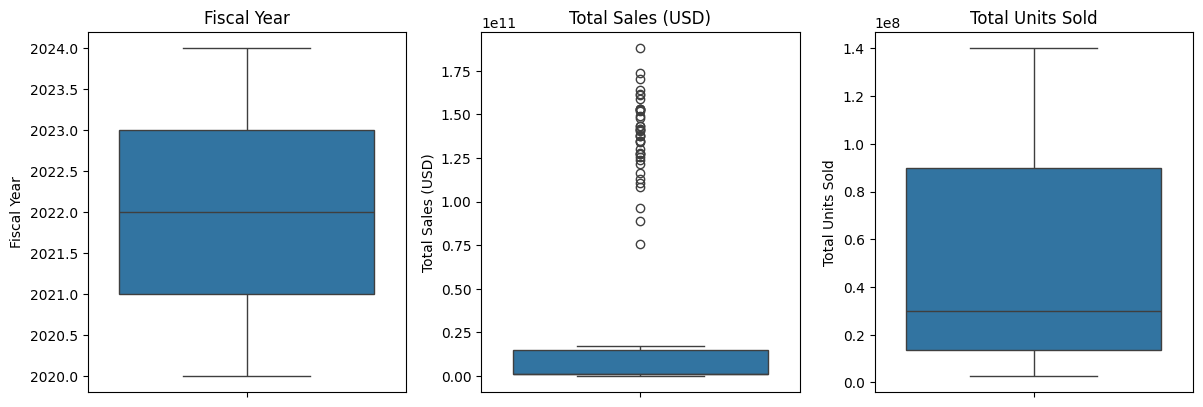


--------------------------------------------------

🔍 Generating Boxplots for stock_price_df:



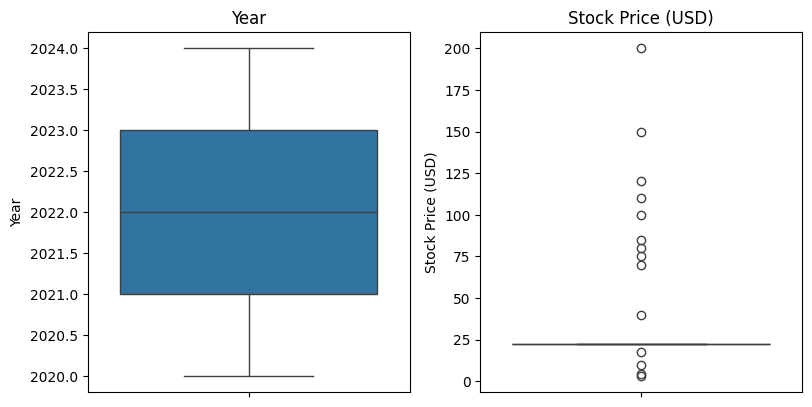


--------------------------------------------------

🔍 Generating Boxplots for game_console_df:

⚠️ No numerical columns in game_console_df for boxplot visualization.

🔍 Generating Boxplots for category_sales_df:



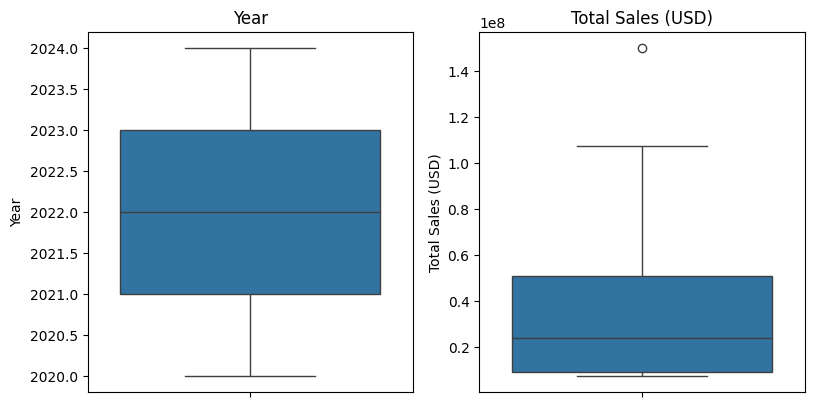


--------------------------------------------------

🔍 Generating Boxplots for dept_sales_df:



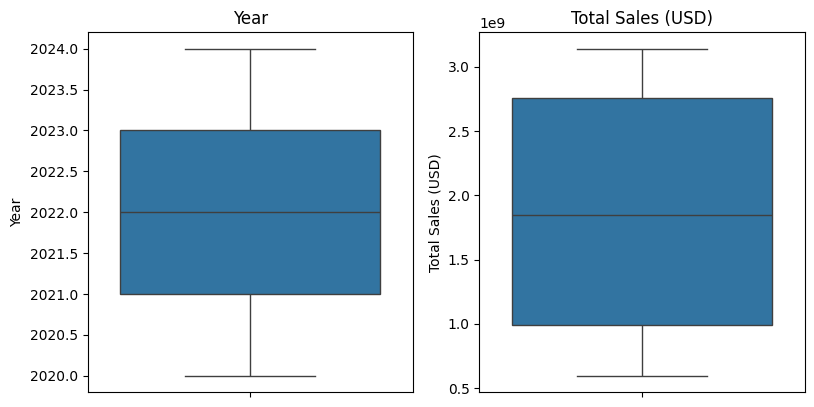


--------------------------------------------------

🔍 Generating Boxplots for top_games_df:



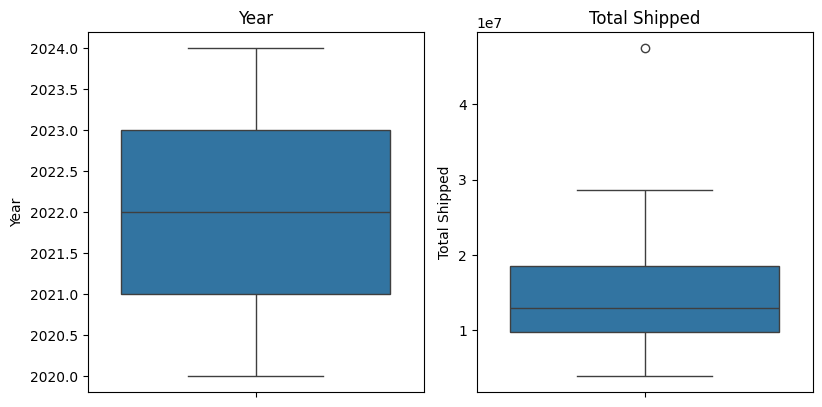


--------------------------------------------------

🔍 Generating Boxplots for nft_sales_df:



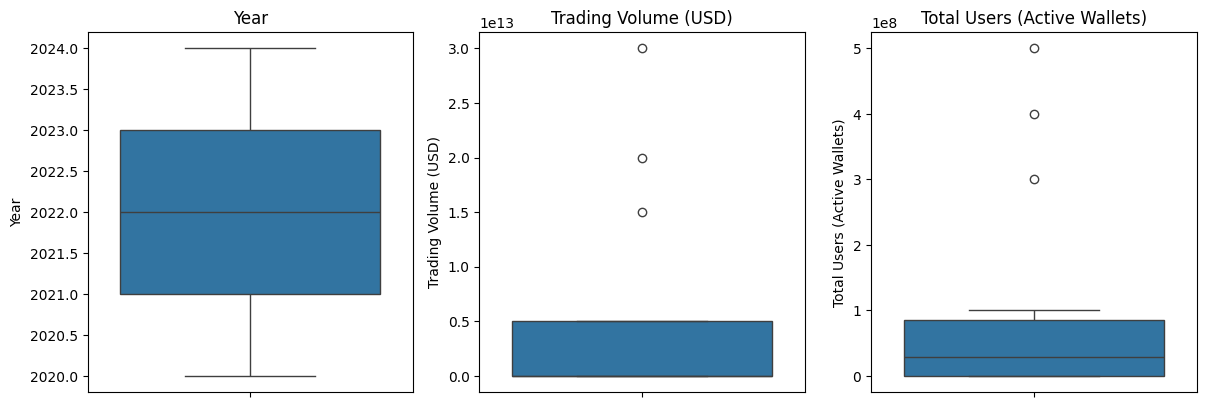


--------------------------------------------------

🔍 Generating Boxplots for card_grading_sales_df:



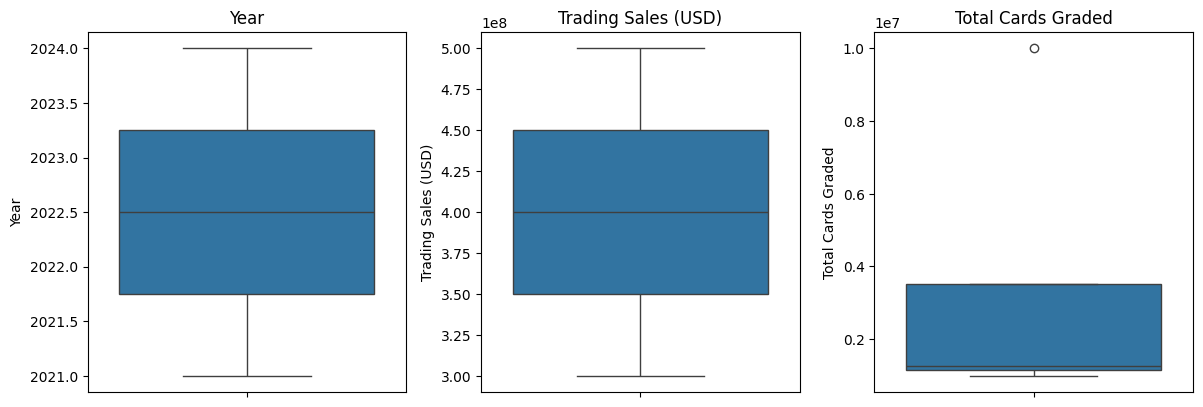


--------------------------------------------------

🔍 Generating Boxplots for company_df:

⚠️ No numerical columns in company_df for boxplot visualization.



In [24]:
# Check for outliers
# Analyze Missing Values for Each DataFrame
for name, df in dataframes.items():
    print(f"🔍 Generating Boxplots for {name}:\n")

    # Get numerical columns
    num_columns = df.select_dtypes(include=['number']).columns

    if len(num_columns) == 0:
        print(f"⚠️ No numerical columns in {name} for boxplot visualization.\n")
        continue  # Skip if no numerical columns exist

    # Define grid size (5 columns per row)
    num_cols = 5
    num_rows = (len(num_columns) // num_cols) + (len(num_columns) % num_cols > 0)

    # Create a figure with a grid of subplots
    plt.figure(figsize=(20, 4 * num_rows))  # Adjust height based on the number of rows

    # Loop through numerical columns and create boxplots
    for i, col in enumerate(num_columns, 1):
        plt.subplot(num_rows, num_cols, i)  # Position plot in a 5-column grid
        sns.boxplot(y=df[col])
        plt.title(f"{col}", fontsize=12)  # Remove redundant title and use column name instead

    # Adjust layout to prevent overlap
    plt.tight_layout()
    #plt.suptitle(f"Boxplots for {name}", fontsize=16)
    plt.subplots_adjust(top=0.95)  # Adjust title position to avoid overlap

    # Display plot
    plt.show()

    print("\n" + "-"*50 + "\n")  # Separator for readability

## Data Preprocessing

### Handling Missing Data

In [25]:
# Sales Table - Total Units Sold - Default missing values to 0 because this feature is only applicable to Gaming Consoles
sales_df.loc[:, "Total Units Sold"] = sales_df["Total Units Sold"].fillna(0)

In [26]:
# NFT Sales Table - Trading Volume (USD) and Total Users - Forward fill missing data for 2024, retain 0 for 2020
# Sort the dataframe by 'Company ID' and 'Year' to ensure proper grouping and chronological order
nft_sales_df = nft_sales_df.sort_values(by=['Company ID', 'Year'])

# Define the columns to impute
columns_to_impute = ['Trading Volume (USD)', 'Total Users (Active Wallets)']

# Handle 2020 missing data (set to 0 for each company independently)
for col in columns_to_impute:
    # Set the 2020 missing values to 0 for each company independently
    nft_sales_df.loc[(nft_sales_df['Year'] == 2020) & (nft_sales_df[col].isnull()), col] = 0

# Forward fill missing values within each company
for company_id, company_data in nft_sales_df.groupby('Company ID'):
    for col in columns_to_impute:
        # Apply forward fill directly
        company_data[col] = company_data[col].ffill()
        
        # Update the original dataframe with forward-filled values for each company
        nft_sales_df.update(company_data)

# Print the updated dataframe
print(nft_sales_df)

        Company ID  Year  Trading Volume (USD)  Total Users (Active Wallets)  \
5             Blur  2022          2.600000e+08                      125000.0   
6             Blur  2023          2.100000e+09                      350000.0   
7             Blur  2024          2.100000e+09                      400000.0   
13  Crypto_Overall  2020          5.000000e+12                   100000000.0   
14  Crypto_Overall  2021          1.500000e+13                   300000000.0   
15  Crypto_Overall  2022          3.000000e+13                   400000000.0   
16  Crypto_Overall  2023          2.000000e+13                   500000000.0   
17  Crypto_Overall  2024          2.000000e+13                   500000000.0   
8      NFT_Overall  2020          1.000000e+08                      500000.0   
9      NFT_Overall  2021          2.500000e+10                    28000000.0   
10     NFT_Overall  2022          2.400000e+10                    35000000.0   
11     NFT_Overall  2023          1.0000

In [27]:
# Card Grading Sales Table - Trading Sales - Forward fill missing data for 2024, retain 0 for 2020
# Sort the dataframe by 'Company ID' and 'Year' to ensure proper grouping and chronological order
card_grading_sales_df = card_grading_sales_df.sort_values(by=['Company ID', 'Year'])

# Define the columns to impute
columns_to_impute = ['Trading Sales (USD)']

# Handle 2020 missing data (set to 0 for each company independently)
for col in columns_to_impute:
    # Set the 2020 missing values to 0 for each company independently
    card_grading_sales_df.loc[(card_grading_sales_df['Year'] == 2020) & (card_grading_sales_df[col].isnull()), col] = 0

# Forward fill missing values within each company
for company_id, company_data in card_grading_sales_df.groupby('Company ID'):
    for col in columns_to_impute:
        # Apply forward fill directly
        company_data[col] = company_data[col].ffill()
        
        # Update the original dataframe with forward-filled values for each company
        card_grading_sales_df.update(company_data)

# Print the updated dataframe
print(card_grading_sales_df)

  Company ID  Year  Trading Sales (USD)  Total Cards Graded  \
0        PSA  2021          500000000.0            10000000   
1        PSA  2022          400000000.0              987092   
2        PSA  2023          300000000.0             1200000   
3        PSA  2024          300000000.0             1339548   

                                               Notes  
0  Record-breaking year due to pandemic-induced h...  
1  Market correction; PSA reduced capacity to cle...  
2  Continued normalization; focus on higher-value...  
3  Strong start to the year; sales data not yet d...  


In [28]:
# Company Table - Revenue Size - Tag missing values as Not Available
company_df.loc[:, "Revenue Size"] = company_df["Revenue Size"].fillna("Not Available")

### Handling Outliers

In [29]:
# Sales Table - Total Sales (USD) - No action taken as the data represents historical sales from multiple companies, 
# which may naturally contain outliers due to variability in sales volumes. Outliers will be identified and visualized.
 
# Category Sales Table - Total Sales (USD) - No action taken, as this is historical data reflecting different companies' sales. 
# Outliers are expected and will be analyzed and visualized to assess their impact.

# NFT Sales - Trading Volume (USD) and Total Users - No action taken, as these are historical data points that can include outliers 
# due to market fluctuations. Outliers will be visualized and considered during analysis.

# Card Grading Sales - Total Cards Graded - No action taken, as this is historical data with potential outliers due to variations 
# in grading volume across different companies. Outliers will be visualized and analyzed.

## Exporting Completed Dataset (for Power BI)

In [30]:
# Save to an Excel file with multiple sheets
with pd.ExcelWriter('GameStop_Processed_Dataset.xlsx', engine='xlsxwriter') as writer:
    sales_df.to_excel(writer, sheet_name='Sales', index=False)
    stock_price_df.to_excel(writer, sheet_name='Stock Price', index=False)
    game_console_df.to_excel(writer, sheet_name='Game Console', index=False)
    category_sales_df.to_excel(writer, sheet_name='Category Sales', index=False)
    dept_sales_df.to_excel(writer, sheet_name='Dept Sales', index=False)
    top_games_df.to_excel(writer, sheet_name='Top Games', index=False)
    nft_sales_df.to_excel(writer, sheet_name='NFT Sales', index=False)
    card_grading_sales_df.to_excel(writer, sheet_name='Card Grading Sales', index=False)
    company_df.to_excel(writer, sheet_name='Company', index=False)

print("Completed Dataset saved successfully!")

Completed Dataset saved successfully!
